<a href="https://colab.research.google.com/github/Us9r/submission-dicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing dataset
- **Nama:** Pramauladi M.
- **Email:** mpramauladi@gmail.com
- **ID Dicoding:** soryu_asuka

## Menentukan Pertanyaan Bisnis

- Bagaimana penggunaan sepeda sepanjang tahun 2011 hingga 2012?
- Bagaimana penggunaan sepeda berdasarkan waktu pagi, siang dan sore? kapan waktu yang populer untuk penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
bike_sharing_day = pd.read_csv('https://raw.githubusercontent.com/Us9r/submission-dicoding/main/data/day.csv')
bike_sharing_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
bike_sharing_hour = pd.read_csv('https://raw.githubusercontent.com/Us9r/submission-dicoding/main/data/hour.csv')
bike_sharing_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**


> Load day.csv as bike_sharing_day and hour.csv as bike_sharing_hour from my github repo, with the following detail:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
 + weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [8]:
bike_sharing_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [14]:
bike_sharing_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
bike_sharing_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
bike_sharing_day.duplicated().sum()

0

In [15]:
bike_sharing_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
bike_sharing_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [17]:
bike_sharing_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [18]:
bike_sharing_hour.duplicated().sum()

0

**Insight:**
> bike_sharing_day df has:
- dteday wrong datatype as object, should be datetime
- no missing values
- no duplicated
- has no outliers
- has normalized value in the following columns: temp, atemp, hum, windspeed.

> bike_sharing_hour df has:
- dteday wrong datatype as object, should be datetime
- no missing values
- no duplicated
- has no outliers
- has normalized value in the following columns: temp, atemp, hum, windspeed



### Cleaning Data

In [19]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    bike_sharing_day[column] = pd.to_datetime(bike_sharing_day[column])
    bike_sharing_hour[column] = pd.to_datetime(bike_sharing_hour[column])

In [45]:
bike_sharing_day['yr'] = bike_sharing_day['yr'].map({0: 2011, 1: 2012})
bike_sharing_hour['yr'] = bike_sharing_hour['yr'].map({0: 2011, 1: 2012})

In [46]:
bike_sharing_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    int64         
 10  atemp       731 non-null    int64         
 11  hum         731 non-null    int64         
 12  windspeed   731 non-null    int64         
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
 16  yr_month    731 non-null  

In [26]:
max_values = {
    'temp': 41,
    'atemp': 50,
    'hum': 100,
    'windspeed': 67
}

def denormalize_value(value, max_value):
    return value * max_value

for column in max_values:
    bike_sharing_day[column] = bike_sharing_day[column].apply(lambda x: denormalize_value(x, max_values[column]))
    bike_sharing_hour[column] = bike_sharing_hour[column].apply(lambda x: denormalize_value(x, max_values[column]))

In [47]:
print(bike_sharing_day.head())
print(bike_sharing_hour.head())

   instant     dteday  season    yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1  2011     1        0        6           0   
1        2 2011-01-02       1  2011     1        0        0           0   
2        3 2011-01-03       1  2011     1        0        1           1   
3        4 2011-01-04       1  2011     1        0        2           1   
4        5 2011-01-05       1  2011     1        0        3           1   

   weathersit  temp  atemp  hum  windspeed  casual  registered   cnt yr_month  
0           2    14     18   81         11     331         654   985      0-1  
1           2    15     18   70         17     131         670   801      0-1  
2           1     8      9   44         17     120        1229  1349      0-1  
3           1     8     11   59         11     108        1454  1562      0-1  
4           1     9     11   44         13      82        1518  1600      0-1  
   instant     dteday  season    yr  mnth  hr  holiday  weekday  work

In [29]:
for column in max_values:
    bike_sharing_day[column] = bike_sharing_day[column].round().astype(int)
    bike_sharing_hour[column] = bike_sharing_hour[column].round().astype(int)

In [30]:
print(bike_sharing_day.head())
print(bike_sharing_hour.head())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit  temp  atemp  hum  windspeed  casual  registered   cnt  
0           2    14     18   81         11     331         654   985  
1           2    15     18   70         17     131         670   801  
2           1     8      9   44         17     120        1229  1349  
3           1     8     11   59         11     108        1454  1562  
4           1     9     11   44         13      82        1518  1600  
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0      

In [33]:
bike_sharing_hour.windspeed.max()

57

**Insight:**
- changed yr value from 0 and 1 to 2011 and 2012
- changed datatype for dteday column from object to datetime
- denormalize on temp, atemp, hum, windspeed
- eliminante comma and change datatype for denormalized column to int

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
bike_sharing_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.314637,23.735978,62.792066,12.767442,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,2.000000,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,14.000000,17.000000,52.000000,9.000000,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.000000,24.000000,63.000000,12.000000,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,27.000000,30.000000,73.000000,16.000000,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.000000,42.000000,97.000000,34.000000,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.531453,8.144756,14.263585,5.190939,686.622488,1560.256377,1937.211452


In [48]:
bike_sharing_day['yr_month'] = bike_sharing_day.apply(lambda row: f"{row['yr']}-{row['mnth']}", axis=1)

bike_sharing_day.groupby(by="yr_month").agg({
    "cnt": ["sum", "mean", "max", "min", "std"],
    "temp": ["max", "min", "mean", "std"],
    "atemp": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"],
    "windspeed": ["max", "min", "mean", "std"]
})

cnt                                       temp                 \
             sum         mean   max   min          std  max min       mean   
yr_month                                                                     
2011-1     38189  1231.903226  1985   431   372.432665   15   2   8.064516   
2011-10   123511  3984.225806  5511   627  1103.481844   24  10  19.258065   
2011-11   102167  3405.566667  4486  1495   788.249290   22  11  16.433333   
2011-12    87323  2816.870968  3940   705   958.763187   19   9  13.322581   
2011-2     48215  1721.964286  2927  1005   398.508839   21   6  11.642857   
2011-3     64045  2065.967742  3239   605   550.971716   22   8  13.580645   
2011-4     94870  3162.333333  5312   795  1042.093593   26  12  19.333333   
2011-5    135821  4381.322581  5805  2633   572.927883   32  17  23.741935   
2011-6    143512  4783.733333  5515  3767   444.447812   33  25  28.500000   
2011-7    141341  4559.387097  6043  3285   680.090762   35  27  31.161290   
2011-8    136691  4409.387097  5895  1115   809.852401   32  26  28.870968   
2011-9    127418  4247.266667  5423  1842   965.377251   29  19  25.166667   
2012-1     96744  3120.774194  4521  1301   872.852134   17   4  11.258065   
2012-10   198841  6414.225806  8156    22  1941.819400   27  13  20.483871   
2012-11   152664  5088.800000  6852  2277  1129.731198   20  10  13.733333   
2012-12   123713  3990.741935  6606   441  1803.227864   20   9  13.193548   
2012-2    103137  3556.448276  5062  1529   870.724640   19   5  12.931034   
2012-3    164875  5318.548387  8362  3194  1251.162682   25  10  18.419355   
2012-4    174224  5807.466667  7460  1027  1308.938916   27  13  19.133333   
2012-5    195865  6318.225806  8294  2843  1078.403997   30  21  25.096774   
2012-6    202830  6761.000000  8120  4127   954.204995   34  22  27.700000   
2012-7    203607  6567.967742  8173  4459   867.183736   35  24  30.838710   
2012-8    214503  6919.451613  7865  4549   794.059017   33  26  29.225806   
2012-9    218573  7285.766667  8714  4073   979.160925   31  21  25.566667   

                   atemp  ...                      hum                 \
               std   max  ...       mean       std max min       mean   
yr_month                  ...                                           
2011-1    2.606856    18  ...  10.290323  3.216557  86  40  58.483871   
2011-10   3.415335    28  ...  22.935484  3.965984  91  48  70.645161   
2011-11   2.737773    26  ...  20.033333  3.068003  96  41  67.466667   
2011-12   2.688086    23  ...  16.516129  3.118450  97  49  64.967742   
2011-2    3.763512    26  ...  14.250000  4.477309  93  19  56.071429   
2011-3    3.041646    26  ...  16.258065  3.595995  95   0  57.000000   
2011-4    3.994249    30  ...  22.833333  4.472778  89  41  66.900000   
2011-5    3.444491    36  ...  27.612903  3.574702  92  44  71.354839   
2011-6    2.080285    38  ...  32.366667  2.281611  77  30  59.266667   
2011-7    2.018197    42  ...  35.419355  2.754078  76  40  58.935484   
2011-8    1.627717    36  ...  32.741935  1.632335  85  42  62.645161   
2011-9    2.408080    33  ...  28.433333  2.299675  97  59  78.433333   
2012-1    3.444491    21  ...  13.774194  4.208798  91  31  58.677419   
2012-10   3.335376    30  ...  24.290323  3.485145  88  46  68.064516   
2012-11   1.981524    24  ...  16.700000  2.548157  79  33  57.400000   
2012-12   3.102895    23  ...  16.129032  3.612404  92  44  68.290323   
2012-2    2.987247    23  ...  15.793103  3.802061  80  40  57.413793   
2012-3    4.023052    29  ...  22.000000  4.633213  89  29  60.838710   
2012-4    3.148435    31  ...  22.966667  3.633971  84  25  50.833333   
2012-5    2.196282    34  ...  29.032258  2.213351  81  36  66.483871   
2012-6    3.196442    39  ...  31.500000  3.202908  83  36  55.800000   
2012-7    2.395785    40  ...  34.903226  2.808972  87  45  60.580645   
2012-8    1.726455    38  ...  32.387097  4.318004  85  52  64.838710   
2012-9  

In [49]:
bike_sharing_day.groupby('workingday')['cnt'].agg(['sum', 'mean', 'max', 'min', 'std'])


,sum,mean,max,min,std
workingday,,,,,
0,1000269,4330.168831,8714,605,2052.141245
1,2292410,4584.820000,8362,22,1878.415583


In [65]:
waktu_pagi = bike_sharing_hour[(bike_sharing_hour['hr'] >= 6) & (bike_sharing_hour['hr'] < 12)]
waktu_siang = bike_sharing_hour[(bike_sharing_hour['hr'] >= 12) & (bike_sharing_hour['hr'] < 18)]
waktu_sore = bike_sharing_hour[(bike_sharing_hour['hr'] >= 18) & (bike_sharing_hour['hr'] < 22)]
waktu_malam = bike_sharing_hour[(bike_sharing_hour['hr'] >= 22) | (bike_sharing_hour['hr'] < 0)]
waktu_tengah_malam = bike_sharing_hour[(bike_sharing_hour['hr'] >= 0) & (bike_sharing_hour['hr'] < 6)]

In [67]:
analysis_pagi = waktu_pagi['cnt'].agg(['sum', 'mean', 'max', 'min', 'std'])
analysis_siang = waktu_siang['cnt'].agg(['sum', 'mean', 'max', 'min', 'std'])
analysis_sore = waktu_sore['cnt'].agg(['sum', 'mean', 'max', 'min', 'std'])
analysis_malam = waktu_malam['cnt'].agg(['sum', 'mean', 'max', 'min', 'std'])
analysis_tengah_malam = waktu_tengah_malam['cnt'].agg(['sum', 'mean', 'max', 'min', 'std'])


In [68]:
print("Pagi:")
print(analysis_pagi)
print("\nSiang:")
print(analysis_siang)
print("\nSore:")
print(analysis_sore)
print("\nMalam:")
print(analysis_malam)
print("\nTengah Malam:")
print(analysis_tengah_malam)

Pagi:
sum     907319.000000
mean       208.100688
max        839.000000
min          1.000000
std        163.972903
Name: cnt, dtype: float64

Siang:
sum     1.292742e+06
mean    2.954839e+02
max     9.760000e+02
min     3.000000e+00
std     1.816563e+02
Name: cnt, dtype: float64

Sore:
sum     826556.000000
mean       283.844780
max        977.000000
min          6.000000
std        183.923038
Name: cnt, dtype: float64

Malam:
sum     159553.000000
mean       109.583104
max        502.000000
min          2.000000
std         64.878792
Name: cnt, dtype: float64

Tengah Malam:
sum     106509.000000
mean        24.908559
max        283.000000
min          1.000000
std         30.274492
Name: cnt, dtype: float64


**Insight:**
- Bagaimana penggunaan sepeda sepanjang tahun 2011 hingga 2012?
  Penggunaan sepeda sepanjang tahun 2011 hingga 2012 mengalami fluktuatif, penggunaan tertinggi terjadi pada september 2012
- Bagaimana penggunaan sepeda berdasarkan waktu pagi, siang dan sore? kapan waktu yang paling populer untuk penggunaan sepeda?  waktu siang adalah waktu yang paling populer untuk penggunaan sepeda, dengan jumlah total penggunaan sepeda yang paling tinggi dan rata-rata penggunaan sepeda yang paling tinggi. Waktu siang juga memiliki maksimum penggunaan sepeda yang paling tinggi, yaitu 976.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penggunaan sepeda sepanjang tahun 2011 hingga 2012?

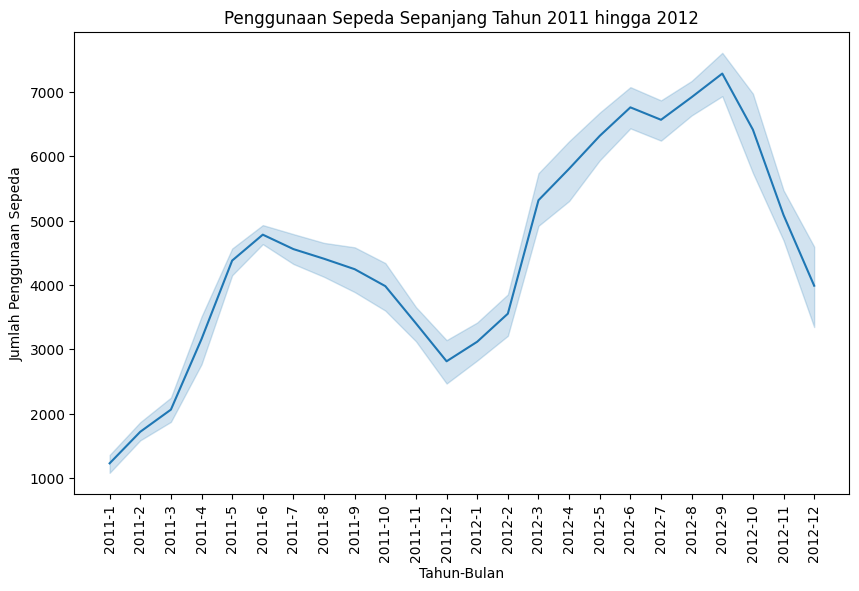

In [61]:
plt.figure(figsize=(10,6))
sns.lineplot(x='yr_month', y='cnt', data=bike_sharing_day)
plt.title('Penggunaan Sepeda Sepanjang Tahun 2011 hingga 2012')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.xticks(rotation=90)
plt.show()

### Pertanyaan 2: Bagaimana penggunaan sepeda berdasarkan waktu pagi, siang dan sore? kapan waktu yang populer untuk penggunaan sepeda?

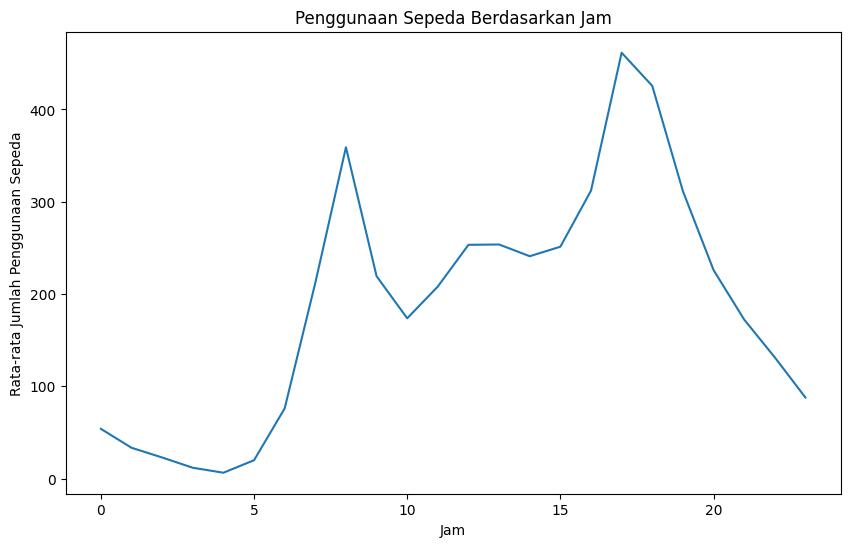

In [71]:
hourly_data = bike_sharing_hour.groupby('hr')['cnt'].mean().reset_index()

# Plot data
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_data)
plt.title('Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penggunaan Sepeda')
plt.show()

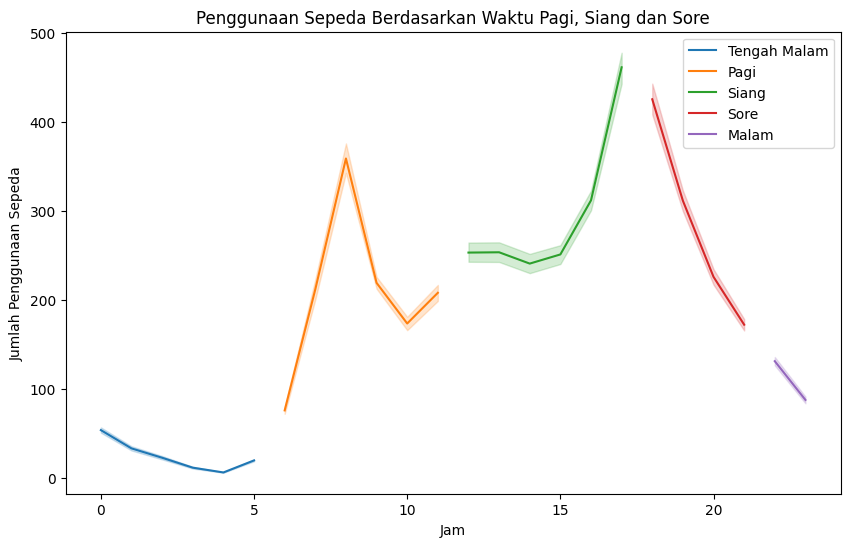

In [72]:
plt.figure(figsize=(10,6))
sns.lineplot(x='hr', y='cnt', data=waktu_tengah_malam, label='Tengah Malam')
sns.lineplot(x='hr', y='cnt', data=waktu_pagi, label='Pagi')
sns.lineplot(x='hr', y='cnt', data=waktu_siang, label='Siang')
sns.lineplot(x='hr', y='cnt', data=waktu_sore, label='Sore')
sns.lineplot(x='hr', y='cnt', data=waktu_malam, label='Malam')
plt.title('Penggunaan Sepeda Berdasarkan Waktu Pagi, Siang dan Sore')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')
plt.legend()
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2